# Data Analisis Penjualan Rumah di Amerika Serikat

## Deskripsi Dataset

Dataset ini merupakan kumpulan data sintetis yang berisi 3.000 listing properti residensial. Data ini dimodelkan menyerupai data penjualan rumah sungguhan di A.S. (dalam format ala Zillow) dan dirancang khusus untuk analisis real estat, machine learning, visualisasi data, serta praktik web scraping.

Setiap baris merepresentasikan properti unik dan mencakup 16 fitur utama yang umum digunakan oleh agen real estat, investor, dan analis. Data ini mencakup berbagai negara bagian dan kota di A.S., dengan nilai-nilai realistis untuk harga, luas area, jumlah kamar tidur/mandi, tipe properti, dan banyak lagi.

## Sumber Data

Dataset ini diperoleh dari platform Kaggle. Dataset dapat ditemukan pada link berikut:

https://www.kaggle.com/datasets/abdulwadood11220/usa-house-sales-data

## Kolom Data

Dataset ini memiliki kolom-kolom berikut, yang memberikan detail tentang setiap properti:

• Price: Harga penjualan properti.
• Address: Alamat lengkap properti.
• City: Kota lokasi properti.
• Zipcode: Kode pos properti.
• State: Negara bagian lokasi properti (misal: CA, NY, TX, dll.).
• Bedrooms: Jumlah kamar tidur di properti (format "X bds", perlu diekstrak angka).
• Bathrooms: Jumlah kamar mandi di properti (format "X ba", perlu diekstrak angka).
• Area (Sqft): Luas area dalam kaki persegi (sqft) (format "X sqft", perlu diekstrak angka).
• Lot Size: Ukuran luas tanah dalam kaki persegi (sqft) (format "X sqft", perlu diekstrak angka).
• Year Built: Tahun pembangunan properti.
• Days on Market: Jumlah hari properti berada di pasar.
• Property Type: Jenis properti (misal: Townhouse, Apartment, Single Family, Multi-Family, Condo).
• MLS ID: ID Multiple Listing Service properti.
• Listing Agent: Nama agen properti yang listing properti tersebut.
• Status: Status penjualan properti (misal: For Sale, Sold, Pending).
• Listing URL: Tautan URL ke listing properti

## Tujuan dan Penggunaan Potensial

Dataset ini dapat dimanfaatkan untuk berbagai tujuan analisis, antara lain:

• Eksplorasi Data Analisis (EDA): Untuk memahami distribusi dan hubungan antar variabel serta mendapatkan insight awal pasar real estat AS.

• Pelatihan Model Regresi/Klasifikasi: Membangun model machine learning untuk memprediksi harga rumah atau mengklasifikasikan tipe properti.

• Rekayasa Fitur dan Pra-pemrosesan: Latihan membersihkan, mengubah, dan membuat fitur baru dari data mentah.

• Dashboard Real Estat dan Mockup Aplikasi Web: Membuat visualisasi interaktif atau prototipe aplikasi.

• Latihan dengan Pustaka Data: Berlatih menggunakan alat seperti BeautifulSoup, Pandas, atau Power BI untuk memanipulasi dan menganalisis data.

# Load Dataset

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv(r"C:\Users\wahyu\Downloads\archive (2)\us_house_Sales_data.csv", )
df.sample(3)

# Exploratory Data Analysis

## Overview Data

Melakukan investigasi awal terhadap data untuk memahami karakteristik dan informasi yang terkandung didalamnya termasuk missing value dan duplikat.

In [73]:
df.shape

(3000, 16)

In [74]:
# overview
list_item = []
for col in df.columns:
    list_item.append([col, df[col].dtype, df[col].isna().sum(), round(100*df[col].isna().sum()/len(df[col]), 2), df[col].nunique(), df[col].unique()[:10]])
desc_df = pd.DataFrame(data=list_item, columns='feature, data_type, null_values, null_percentage, unique_values, unique_sample'.split(","))
desc_df

,feature,data_type,null_values,null_percentage,unique_values,unique_sample
0,Price,object,0,0.0,2996,"[$554,217, $164,454, $1,249,331, $189,267, $46..."
1,Address,object,0,0.0,3000,"[5926 Oak Ave, San Diego, CA 65383, 9583 Oak A..."
...,...,...,...,...,...,...
14,Status,object,0,0.0,3,"[For Sale, Sold, Pending]"
15,Listing URL,object,0,0.0,3000,[https://www.zillow.com/homedetails/80374762_z...


In [75]:
df.duplicated().sum()

np.int64(0)

In [76]:
# numerikal fitur
nums = df.loc[:, (df.dtypes == 'int64') | (df.dtypes == float)].columns.tolist()
nums

['Zipcode', 'Year Built', 'Days on Market']

In [77]:
# kategorikal fitur
cats = df.loc[:, (df.dtypes == 'object')].columns.tolist()
cats

['Price',
 'Address',
 'City',
 'State',
 'Bedrooms',
 'Bathrooms',
 'Area (Sqft)',
 'Lot Size',
 'Property Type',
 'MLS ID',
 'Listing Agent',
 'Status',
 'Listing URL']

Key Takeaways:

• Dataset terdiri dari 3000 baris dan 16 kolom dengan 3 fitur numerikal dan 13 fitur kategorikal
• Tidak ada duplikat data

## Statistical Summary

In [78]:
df[nums].describe().round(0).T

,count,mean,std,min,25%,50%,75%,max
Zipcode,3000.0,55264.0,25924.0,10006.0,33364.0,55468.0,77692.0,99955.0
Year Built,3000.0,1987.0,21.0,1950.0,1968.0,1987.0,2006.0,2023.0
Days on Market,3000.0,61.0,35.0,1.0,31.0,62.0,91.0,120.0


In [79]:
df[cats].describe().T

,count,unique,top,freq
Price,3000,2996,"$102,028",2
Address,3000,3000,"4392 Maple Dr, Los Angeles, NY 89198",1
...,...,...,...,...
Status,3000,3,Sold,1045
Listing URL,3000,3000,https://www.zillow.com/homedetails/64854326_zpid/,1


## Unvariate Analysis

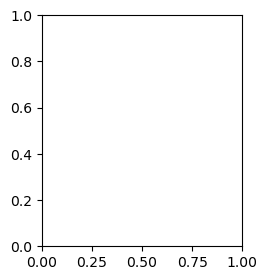

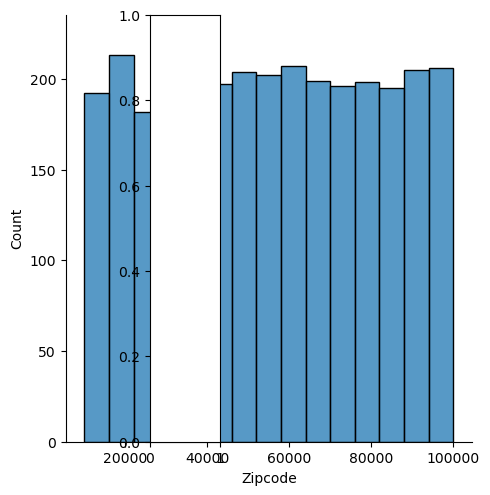

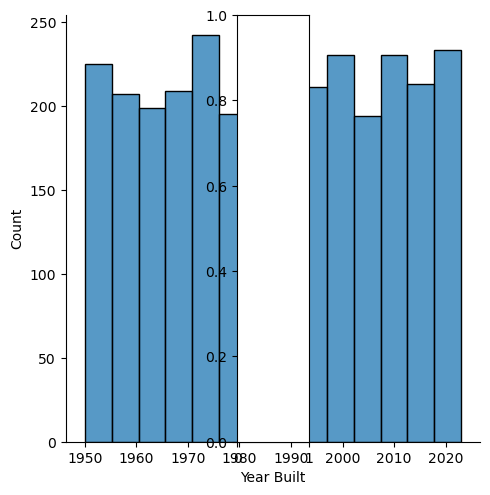

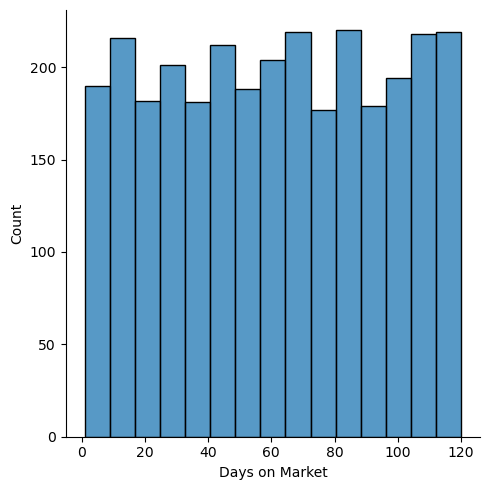

In [85]:
# distribusi menggunakan displot
plt.figure(figsize=(15, 3))
for i in range(0, len(nums)):
    plt.subplot(1, 5, i+1)
    sns.displot(df[nums[i]])
    plt.tight_layout()

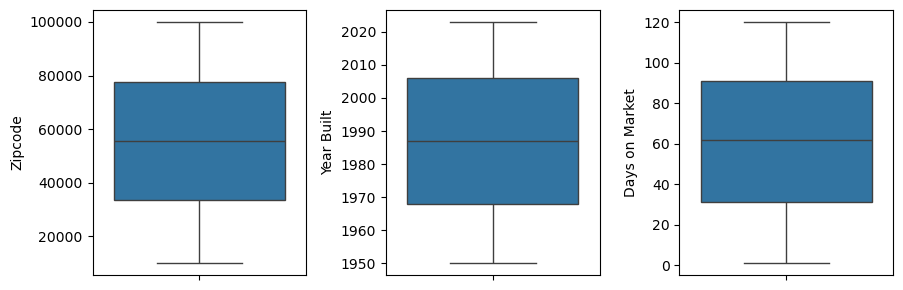

In [88]:
# distribusi menggunakan boxplot
plt.figure(figsize=(15, 3))
for i in range(0, len(nums)):
    plt.subplot(1, 5, i+1)
    sns.boxplot(df, y=df[nums[i]], orient='v')
    plt.tight_layout()

In [89]:
for col in cats:
    print(f'''Value count kolom {col}:''')
    print('-' * 50)
    print(df[col].value_counts())
    print()

Value count kolom Price:
--------------------------------------------------
Price
$102,028      2
$1,280,680    2
             ..
$704,012      1
$189,267      1
Name: count, Length: 2996, dtype: int64

Value count kolom Address:
--------------------------------------------------
Address
4392 Maple Dr, Los Angeles, NY 89198    1
5926 Oak Ave, San Diego, CA 65383       1
                                       ..
8382 Main St, Sacramento, CA 74703      1
1193 Oak Ave, San Diego, NY 19858       1
Name: count, Length: 3000, dtype: int64

Value count kolom City:
--------------------------------------------------
City
Los Angeles      617
Sacramento       609
San Francisco    605
San Diego        586
Fresno           583
Name: count, dtype: int64

Value count kolom State:
--------------------------------------------------
State
CA    659
IL    599
NY    599
FL    578
TX    565
Name: count, dtype: int64

Value count kolom Bedrooms:
--------------------------------------------------
Bedrooms
2

# Data Preprocessing

## Data Cleaning

In [99]:
df_cleaned = df

Handling Missing Value

Pada fitur numerikal missing value diisi dengan median, karena lebih robust
Pada fitur kategorikal missing value diisi dengan modus

In [100]:
df_cleaned.isna().sum()

Price          0
Address        0
              ..
Status         0
Listing URL    0
Length: 16, dtype: int64

In [101]:
df_prep = df_cleaned

In [102]:
df_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Price           3000 non-null   object
 1   Address         3000 non-null   object
 2   City            3000 non-null   object
 3   Zipcode         3000 non-null   int64 
 4   State           3000 non-null   object
 5   Bedrooms        3000 non-null   object
 6   Bathrooms       3000 non-null   object
 7   Area (Sqft)     3000 non-null   object
 8   Lot Size        3000 non-null   object
 9   Year Built      3000 non-null   int64 
 10  Days on Market  3000 non-null   int64 
 11  Property Type   3000 non-null   object
 12  MLS ID          3000 non-null   object
 13  Listing Agent   3000 non-null   object
 14  Status          3000 non-null   object
 15  Listing URL     3000 non-null   object
dtypes: int64(3), object(13)
memory usage: 375.1+ KB
